```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Function Approximation

`Supervised learning` in machine learning can be described in terms of `function approximation`. Given a dataset comprised of inputs and outputs, we assume that there is an unknown underlying function that is consistent in mapping inputs to outputs in the target domain and resulted in the dataset. **We** then **use supervised learning algorithms to approximate this function**.

`Function approximation` is a technique for estimating an unknown underlying function using historical or available observations from the domain.

Artificial neural networks learn to approximate a function. We can think of this mapping as being governed by a mathematical function, called the `mapping function`, and it is this function that a supervised learning algorithm seeks to best approximate.

We say `approximate` because although we suspect such a mapping function exists, we don’t know anything about it. The true function that maps inputs to outputs is unknown and is often referred to as the `target function`. It is the target of the learning process, the function we are trying to approximate using only the data that is available. If we knew the target function, we would not need to approximate it, i.e. we would not need a supervised machine learning algorithm. Therefore, function approximation is only a useful tool when the underlying target mapping function is unknown.

All we have are observations from the domain that contain examples of inputs and outputs. This implies things about the size and quality of the data; for example:
- The more examples we have, the more we might be able to figure out about the mapping function.
- The less noise we have in observations, the more crisp approximation we can make of the mapping function.

For instance, `neural networks` are `a universal approximator` as in theory, they can be used to approximate any target function. `Regression predictive modeling` involves predicting a numerical quantity given inputs. `Classification predictive modeling` involves predicting a class label given inputs. These predictive modeling problems can be seen as examples of `function approximation`.


In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## A Simple Target Function
We can define a simple function with one numerical input variable and one numerical output variable. Later we will try to approximate this simple function.

We can define a domain of numbers as our input, such as floating-point values from -50 to 50. We can then select a mathematical operation to apply to the inputs to get the output values. The selected mathematical operation will be the `mapping function`, and because we are choosing it, we will know what it is. In practice, this is not the case and is the reason why we would use a `supervised learning algorithm` like a neural network to learn or discover the mapping function.

In this case, we will use the square of the input as the mapping function, defined as:
```
y = x^2
```
Where `y` is the output variable and `x` is the input variable.

Below there is an example of creating a univariate dataset with a given `mapping function`.

In [54]:
# Define the input data
x = [i for i in range(-50,51)]
print(x)

[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [55]:
# Define the output data
y = [i**2 for i in x] # y's are calculated using the mapping function
print(y)

[2500, 2401, 2304, 2209, 2116, 2025, 1936, 1849, 1764, 1681, 1600, 1521, 1444, 1369, 1296, 1225, 1156, 1089, 1024, 961, 900, 841, 784, 729, 676, 625, 576, 529, 484, 441, 400, 361, 324, 289, 256, 225, 196, 169, 144, 121, 100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500]


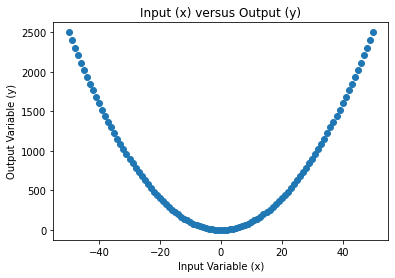

In [56]:
# Plot the input versus the output
plt.scatter(x, y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

## Approximating the Simple Target Function Using Neural Netoworks
The input and output variables represent our dataset. Now, we can pretend to forget that we know what the `mapping function` is and **use a neural network to re-learn or re-discover the mapping function**. 

We can fit a neural network model on examples of inputs and outputs and see if the model can learn the mapping function. This is a very simple mapping function, so we would expect a small neural network could learn it quickly. We will define the network using the `Keras` deep learning library and use some data preparation tools from the `scikit-learn` library.

In [4]:
# Define the dataset
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [5]:
print(x)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


In [6]:
print(y)

[2.500e+03 2.401e+03 2.304e+03 2.209e+03 2.116e+03 2.025e+03 1.936e+03
 1.849e+03 1.764e+03 1.681e+03 1.600e+03 1.521e+03 1.444e+03 1.369e+03
 1.296e+03 1.225e+03 1.156e+03 1.089e+03 1.024e+03 9.610e+02 9.000e+02
 8.410e+02 7.840e+02 7.290e+02 6.760e+02 6.250e+02 5.760e+02 5.290e+02
 4.840e+02 4.410e+02 4.000e+02 3.610e+02 3.240e+02 2.890e+02 2.560e+02
 2.250e+02 1.960e+02 1.690e+02 1.440e+02 1.210e+02 1.000e+02 8.100e+01
 6.400e+01 4.900e+01 3.600e+01 2.500e+01 1.600e+01 9.000e+00 4.000e+00
 1.000e+00 0.000e+00 1.000e+00 4.000e+00 9.000e+00 1.600e+01 2.500e+01
 3.600e+01 4.900e+01 6.400e+01 8.100e+01 1.000e+02 1.210e+02 1.440e+02
 1.690e+02 1.960e+02 2.250e+02 2.560e+02 2.890e+02 3.240e+02 3.610e+02
 4.000e+02 4.410e+02 4.840e+02 5.290e+02 5.760e+02 6.250e+02 6.760e+02
 7.290e+02 7.840e+02 8.410e+02 9.000e+02 9.610e+02 1.024e+03 1.089e+03
 1.156e+03 1.225e+03 1.296e+03 1.369e+03 1.444e+03 1.521e+03 1.600e+03
 1.681e+03 1.764e+03 1.849e+03 1.936e+03 2.025e+03 2.116e+03 2.209e+03
 2.304

In [7]:
# Reshape arrays into into rows and cols so that the input and output variables are columns 
# with one observation per row, as is expected when using supervised learning models
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [8]:
x[:10]

array([[-50],
       [-49],
       [-48],
       [-47],
       [-46],
       [-45],
       [-44],
       [-43],
       [-42],
       [-41]])

In [9]:
y[:10]

array([[2500.],
       [2401.],
       [2304.],
       [2209.],
       [2116.],
       [2025.],
       [1936.],
       [1849.],
       [1764.],
       [1681.]])

The inputs will have a range between -50 and 50, whereas the outputs will have a range between -50^2 (2500) and 0^2 (0). Large input and output values can make training neural networks unstable, therefore, it is a good idea to scale data first. We can use the `MinMaxScaler` to separately normalize the input values and the output values to values in the range between 0 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


With some trial and error, we can choose a model with two hidden layers and 10 nodes in each layer. Perhaps experiment with other configurations to see if you can do better.

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# Design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

We will fit the model using a `mean squared loss` and use the `efficient adam version of stochastic gradient descent` to optimize the model. This means the model will seek to minimize the `mean squared error` between the predictions made and the expected output values (y) while it tries to approximate the mapping function.

In [12]:
# Define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

## Approximating the Simple Target Function Using DecisionTreeRegressor

In [37]:
# Define the dataset
x = np.asarray([i for i in range(-50, 51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [38]:
# Reshape arrays into into rows and cols so that the input and output variables are columns 
# with one observation per row, as is expected when using supervised learning models
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Non-standardized data
m = DecisionTreeRegressor()
m.fit(X_train, y_train.ravel())

DecisionTreeRegressor()

In [42]:
m.score(X_test, y_test)

0.9906775429359957

In [45]:
m.predict([[-50], [-2], [0], [2], [50]])

array([2401.,    4.,    0.,    4., 2500.])

In [47]:
yhat = m.predict(x)

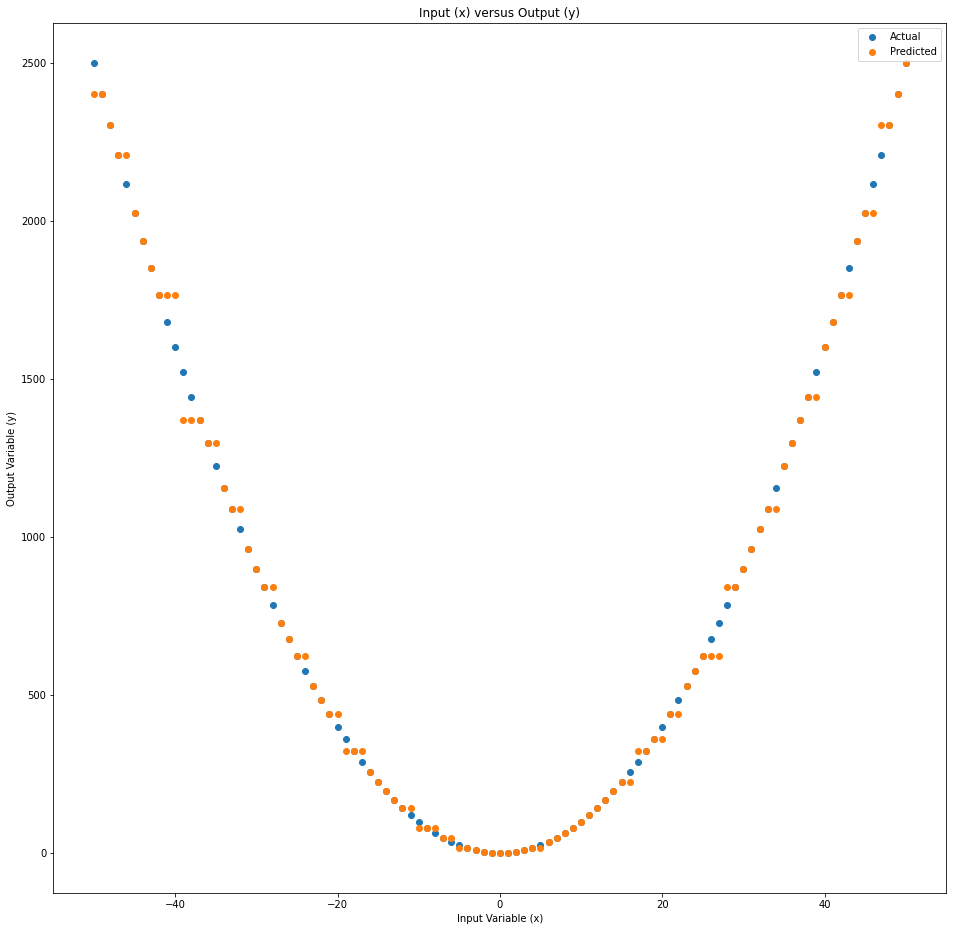

In [53]:
fig, ax = plt.subplots(figsize=(16, 16))

# Plot x vs y
plt.scatter(x, y, label='Actual')

# Plot x vs yhat
plt.scatter(x, yhat, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()